In [1]:
import sys, operator, os, string, re, random, math
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f = open("A7871107.txt")

In [3]:
line_num = 0
speech_dict = {}
tokens = []
text_matrix = []

- Clean up text

In [4]:
for line in f:
    line = re.sub("[\[].*?[\]]", "", line)
    line = line.replace(".","")
    line = line.replace("!","")
    line = line.replace("?","")
    line = line.replace("xxx","")
    line = line.replace("yyy","")
    line = line.replace("zzz","")
    line = line.replace("(g)","g")
    line = line.replace("<", "")
    line = line.replace(">", "")
    line = line.replace("-", " ")
    line = line.replace("(", "")
    line = line.replace(")", "")
    line = line.replace("+", "")
    line = line.replace("/", "")
    line = line.replace('"', "")
    line = line.replace(",", "")
    line = line.replace("VCM0", "VCM")
    line = line.replace("0 ", "")
    
    speech_line = line.strip().strip('\n').strip()
    token_list = speech_line.split()

    for word in token_list:
        if word[0]=="&" or word[0]=="VCM" or word[0]=="VCM0":
            token_list.remove(word)
    if token_list[0][0] != "@":
        text_matrix.append(token_list)

In [5]:
f.close()

- Get total number of sentences in each category

In [6]:
xds = ["T","A","C"]
sentence_dict = {"T":0, "A":0, "C":0}
for i in range(len(text_matrix)):
    for x in xds:
        if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == x:
            sentence_dict[x] += 1
print(sentence_dict)

{'T': 878, 'A': 2357, 'C': 1027}


- Get total word count for T,A and C

In [7]:
t_dict = {"FA1":0, "CHI":0, "FC1":0, "MA1":0}
participants = ["FA1","CHI","FC1","MA1"]
for i in range(len(text_matrix)):
    if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == "T":
        for p in participants:
            if text_matrix[i-1][0] == "*" + p + ":":
                t_dict[p] += len(text_matrix[i-1]) - 2
print(t_dict)

{'FA1': 3090, 'CHI': 0, 'FC1': 95, 'MA1': 533}


In [8]:
a_dict = {"FA1":0, "CHI":0, "FC1":0, "MA1":0}
for i in range(len(text_matrix)):
    if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == "A":
        for p in participants:
            if text_matrix[i-1][0] == "*" + p + ":":
                a_dict[p] += len(text_matrix[i-1]) - 2
print(a_dict)

{'FA1': 1987, 'CHI': 23, 'FC1': 2078, 'MA1': 596}


In [9]:
c_dict = {"FA1":0, "CHI":0, "FC1":0, "MA1":0}
for i in range(len(text_matrix)):
    if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == "C":
        for p in participants:
            if text_matrix[i-1][0] == "*" + p + ":":
                c_dict[p] += len(text_matrix[i-1]) - 2
print(c_dict)

{'FA1': 5044, 'CHI': 0, 'FC1': 19, 'MA1': 898}


In [10]:
total_dict = {"FA1":0, "CHI":0, "FC1":0, "MA1":0}
for i in range(len(text_matrix)):
    for x in xds:
        if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == x:
            for p in participants:
                if text_matrix[i-1][0] == "*" + p + ":":
                    total_dict[p] += len(text_matrix[i-1]) - 2
print(total_dict)

{'FA1': 10121, 'CHI': 23, 'FC1': 2192, 'MA1': 2027}


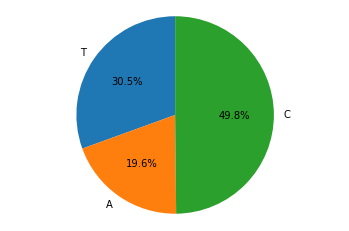

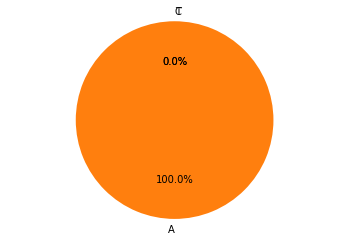

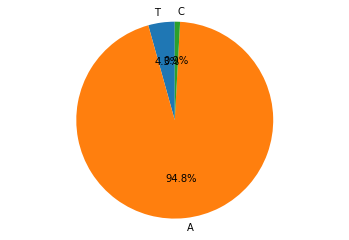

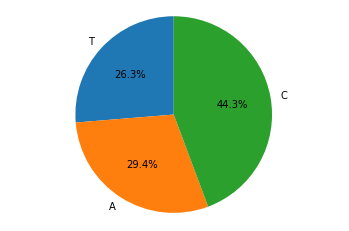

In [11]:
val_fa1 = [t_dict["FA1"],a_dict["FA1"],c_dict["FA1"]]
val_chi = [t_dict["CHI"],a_dict["CHI"],c_dict["CHI"]]
val_fc1 = [t_dict["FC1"],a_dict["FC1"],c_dict["FC1"]]
val_ma1 = [t_dict["MA1"],a_dict["MA1"],c_dict["MA1"]]
fig_fa1, ax_fa1 = plt.subplots()
ax_fa1.pie(val_fa1, labels=xds, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax_fa1.axis('equal')

fig_chi, ax_chi = plt.subplots()
ax_chi.pie(val_chi, labels=xds, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax_chi.axis('equal')

fig_fc1, ax_fc1 = plt.subplots()
ax_fc1.pie(val_fc1, labels=xds, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax_fc1.axis('equal')

fig_ma1, ax_ma1 = plt.subplots()
ax_ma1.pie(val_ma1, labels=xds, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax_ma1.axis('equal')
plt.show()

- Get frequency for each word

In [12]:
word_frequency_t = dict()
for i in range(len(text_matrix)):
    if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == "T":
        for word in text_matrix[i-1][1:-1]:
            if word[0] != "*":
                if word not in word_frequency_t:
                    word_frequency_t[word] = 1
                else:
                    word_frequency_t[word] += 1
sorted_t = sorted(word_frequency_t.items(), key=lambda kv: kv[1])
print(sorted_t[-10:])

[('that', 54), ('to', 54), ('Madison', 57), ('is', 61), ('in', 61), ('I', 69), ('the', 80), ('yeah', 89), ('your', 124), ('you', 220)]


In [13]:
word_frequency_a = dict()
for i in range(len(text_matrix)):
    if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == "A":
        for word in text_matrix[i-1][1:-1]:
            if word[0] != "*":
                if word not in word_frequency_a:
                    word_frequency_a[word] = 1
                else:
                    word_frequency_a[word] += 1
sorted_a = sorted(word_frequency_a.items(), key=lambda kv: kv[1])
print(sorted_a[-10:])

[('yeah', 60), ('and', 63), ('is', 68), ('a', 81), ('to', 81), ('that', 83), ('it', 108), ('you', 119), ('the', 156), ('I', 245)]


In [14]:
word_frequency_c = dict()
for i in range(len(text_matrix)):
    if len(text_matrix[i]) >= 2 and text_matrix[i][0][0] == "%" and text_matrix[i][1] == "C":
        for word in text_matrix[i-1][1:-1]:
            if word[0] != "*":
                if word not in word_frequency_c:
                    word_frequency_c[word] = 1
                else:
                    word_frequency_c[word] += 1
sorted_c = sorted(word_frequency_c.items(), key=lambda kv: kv[1])
print(sorted_c[-10:])

[('and', 78), ('Stella', 84), ('that', 84), ('a', 105), ('your', 117), ('I', 123), ('to', 130), ('it', 136), ('the', 157), ('you', 383)]


- Plot dictionaries

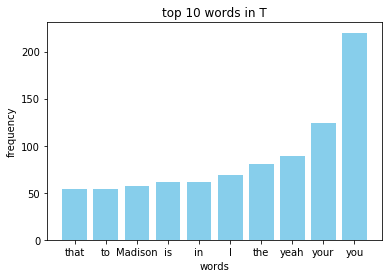

In [15]:
plt.bar(*zip(*sorted_t[-10:]), color = 'skyblue')
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("top 10 words in T")
plt.savefig("top_t_A7871007.png")

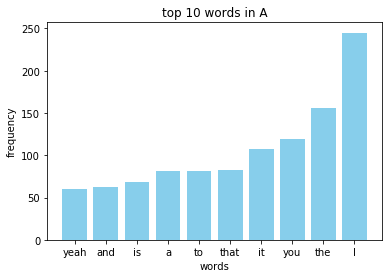

In [16]:
plt.bar(*zip(*sorted_a[-10:]), color = 'skyblue')
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("top 10 words in A")
plt.savefig("top_a_A7871007.png")

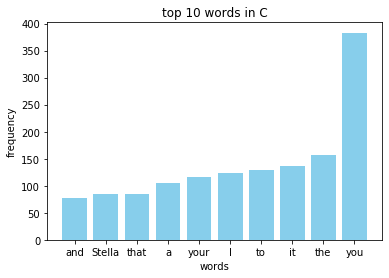

In [17]:
plt.bar(*zip(*sorted_c[-10:]), color = 'skyblue')
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("top 10 words in C")
plt.savefig("top_c_A7871007.png")

In [18]:
val_fa1 = {"T":t_dict["FA1"],"A":a_dict["FA1"],"C":c_dict["FA1"]}
val_chi = {"T":t_dict["CHI"],"A":a_dict["CHI"],"C":c_dict["CHI"]}
val_fc1 = {"T":t_dict["FC1"],"A":a_dict["FC1"],"C":c_dict["FC1"]}
val_ma1 = {"T":t_dict["MA1"],"A":a_dict["MA1"],"C":c_dict["MA1"]}

vis_dict = {"FA1":val_fa1, "FC1":val_fc1, "CHI":val_chi, "MA1":val_ma1}

In [19]:
df = pd.DataFrame(data = vis_dict)
df

,FA1,FC1,CHI,MA1
T,3090,95,0,533
A,1987,2078,23,596
C,5044,19,0,898


In [20]:
vis_list = []
for key in vis_dict.keys():
    for key2 in vis_dict[key].keys():
        vis_list.append([key, key2, vis_dict[key][key2]])
vis_list

[['FA1', 'T', 3090],
 ['FA1', 'A', 1987],
 ['FA1', 'C', 5044],
 ['FC1', 'T', 95],
 ['FC1', 'A', 2078],
 ['FC1', 'C', 19],
 ['CHI', 'T', 0],
 ['CHI', 'A', 23],
 ['CHI', 'C', 0],
 ['MA1', 'T', 533],
 ['MA1', 'A', 596],
 ['MA1', 'C', 898]]

In [21]:
df = pd.DataFrame(data = vis_list, columns = ["participant", "target", "word_count"])
df

,participant,target,word_count
0,FA1,T,3090
1,FA1,A,1987
2,FA1,C,5044
3,FC1,T,95
4,FC1,A,2078
5,FC1,C,19
6,CHI,T,0
7,CHI,A,23
8,CHI,C,0
9,MA1,T,533


In [23]:
df.to_csv("word_count_A7871107.csv")

In [23]:
# # Prepare data
# x_var = 'participant'
# groupby_var = 'target'
# df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)

# vals = [list(df.iloc[::3, :]['word_count']), list(df.iloc[1::3, :]['word_count']), list(df.iloc[2::3, :]['word_count'])]
# print(vals)
# # Draw
# plt.figure(figsize=(16,9), dpi= 80)
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
# n, bins, patches = plt.hist(vals, 4, stacked=True, density=False, color=colors[:len(vals)])

# # Decoration
# plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
# plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
# plt.xlabel(x_var)
# plt.ylabel("Frequency")
# plt.ylim(0, 10)
# plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
# plt.show()

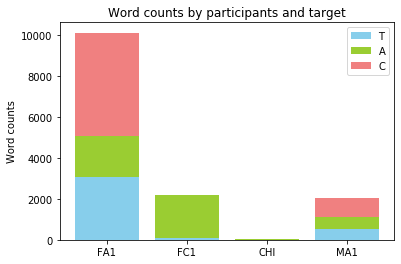

In [22]:
vals = [list(df.iloc[::3, :]['word_count']), list(df.iloc[1::3, :]['word_count']), list(df.iloc[2::3, :]['word_count'])]
bars = np.add(vals[0], vals[1]).tolist()
p1 = plt.bar(list(df['participant'].unique()), vals[0],color = "skyblue")
p2 = plt.bar(list(df['participant'].unique()), vals[1], bottom = vals[0], color = "yellowgreen")
p3 = plt.bar(list(df['participant'].unique()), vals[2], bottom = bars, color = "lightcoral")



plt.ylabel('Word counts')
plt.title('Word counts by participants and target')
plt.legend((p1[0], p2[0], p3[0]), ('T', 'A', 'C'))

plt.savefig("word_count_A7871107.png")